Research question: Imagine you are a Spanish (you can change to your country), considering to become a professional footballer. You may wonder that a random professional football player from your country would earn how much money a week?

In this notebook, I am using simple Linear Regression model to help answer that question.

Specifically, I'm going to perform the following tasks:

1. Exploratory Data Analysis
2. Create simple Linear Regression on those countries who have > 300 players to predict player's Wage (in Euro)
3. Create a predict function to help you easily answer the question

#### Side notes:
- I am new to this, any feedbacks are welcomed
- This is the application of what I have learnt in [Applied Data Science Lab of WorldQuant University](https://www.wqu.edu/programs/applied-ds-lab/), with some modifications. My classmates may find the code familiar.

# Import Data

In [13]:
# 1. Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge

Next, I wil create a wrangle function to load data. I will only use data from those countries which has > 300 listed players to ensure the model works well.

In [14]:
# 2. Create wrangle function
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Create a new Count Nationality column
    df['Nationality Count'] = df.groupby('Nationality')['Nationality'].transform('count')

    # Only take countries that have more than 300 players
    mask_nation = df['Nationality Count'] > 300
    df = df[mask_nation]
    
    return df

In [15]:
# 3. Wrangle data file
df = wrangle('Fifa 23 Players Data.csv')
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Nationality Count
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,88,91,67,66,67,62,53,62,22,937
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,84,89,67,67,67,63,58,63,21,963
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,83,86,67,69,67,64,63,64,22,390
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,82,82,82,78,72,78,24,318
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,84,92,70,66,70,66,57,66,21,963


# Explore Data

In [16]:
# 1. Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12012 entries, 0 to 18537
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     12012 non-null  object
 1   Full Name                    12012 non-null  object
 2   Overall                      12012 non-null  int64 
 3   Potential                    12012 non-null  int64 
 4   Value(in Euro)               12012 non-null  int64 
 5   Positions Played             12012 non-null  object
 6   Best Position                12012 non-null  object
 7   Nationality                  12012 non-null  object
 8   Image Link                   12012 non-null  object
 9   Age                          12012 non-null  int64 
 10  Height(in cm)                12012 non-null  int64 
 11  Weight(in kg)                12012 non-null  int64 
 12  TotalStats                   12012 non-null  int64 
 13  BaseStats                    12

In [17]:
# 2. Describe overall
df.describe().round(decimals=0)

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Nationality Count
count,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,...,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0
mean,66.0,71.0,3130632.0,25.0,182.0,75.0,1600.0,358.0,9689.0,5484982.0,...,57.0,58.0,56.0,56.0,56.0,56.0,55.0,56.0,23.0,818.0
std,7.0,6.0,8471077.0,5.0,7.0,7.0,277.0,40.0,21214.0,16349003.0,...,13.0,14.0,14.0,14.0,14.0,14.0,15.0,14.0,15.0,442.0
min,47.0,48.0,0.0,16.0,156.0,54.0,762.0,224.0,0.0,0.0,...,18.0,18.0,17.0,19.0,17.0,17.0,18.0,17.0,10.0,318.0
25%,61.0,67.0,475000.0,21.0,177.0,70.0,1463.0,330.0,1000.0,600000.0,...,52.0,53.0,51.0,49.0,51.0,49.0,45.0,49.0,17.0,390.0
50%,66.0,71.0,975000.0,25.0,182.0,75.0,1638.0,358.0,3000.0,1400000.0,...,60.0,62.0,59.0,59.0,59.0,59.0,58.0,59.0,18.0,728.0
75%,70.0,75.0,2100000.0,29.0,187.0,80.0,1785.0,385.0,8000.0,3300000.0,...,66.0,67.0,66.0,66.0,66.0,65.0,66.0,65.0,20.0,1074.0
max,91.0,95.0,190500000.0,44.0,206.0,105.0,2312.0,502.0,450000.0,366700000.0,...,91.0,92.0,88.0,89.0,88.0,87.0,90.0,87.0,90.0,1632.0


In [18]:
# 3. Checking the shape of Data Frame
df.shape

(12012, 90)

In [19]:
# 4. Check whether the is any null values
print(df.isnull().sum())
print(f'Total null value count:{df.isnull().sum().sum()}')

Known As             0
Full Name            0
Overall              0
Potential            0
Value(in Euro)       0
                    ..
LB Rating            0
CB Rating            0
RB Rating            0
GK Rating            0
Nationality Count    0
Length: 90, dtype: int64
Total null value count:0


I will look more specific into Nationality feature

In [20]:
# 5. Looking into Nationality feature
df["Nationality"].nunique()

20

In [21]:
# 6. Count value per Nationality
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

England                1632
Germany                1204
Spain                  1074
France                  963
Argentina               937
Brazil                  728
Italy                   623
China PR                439
United States           437
Netherlands             428
Poland                  390
Sweden                  390
Republic of Ireland     385
Portugal                382
Norway                  373
Romania                 341
Saudi Arabia            331
Korea Republic          319
Belgium                 318
Denmark                 318
Name: Nationality, dtype: int64

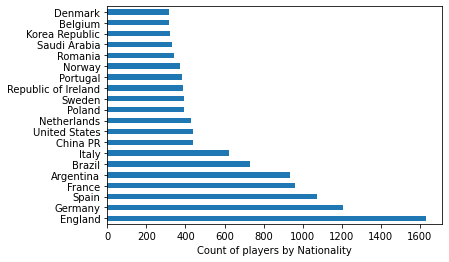

In [22]:
# 7. Plot the count of players
df_nationality_counts.plot(kind="barh")
plt.xlabel("Count of players by Nationality");

# Split Data

The explore step is done. Now comes the step of splitting data for training and testing

In [23]:
target = "Wage(in Euro)"
features = ["Nationality"]
y = df[target]
X = df[features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9609, 1)
y_train shape: (9609,)
X_test shape: (2403, 1)
y_test shape: (2403,)


# Baseline

In [25]:
# 1. We will need to create a naive model to evaluate our Linear Regression result
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price: ", y_mean)
print("Baseline MAE: ", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price:  9597.294203351024
Baseline MAE:  10414.812422023306


# Iterate

In [26]:
# 1. Create model. As the feature data is categorical, I need to use OneHotEncoder transformer.
# The number of categorical values of our feature is 20 (20 countries), therefore I will use Ridge model to regularize the formula
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Nationality'], use_cat_names=True)),
                ('ridge', Ridge())])

# Evaluate

In [27]:
# 1. Evaluate out model performance on training data
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE: ", round(mae_training, 2))

Training MAE:  9747.49


In [125]:
# 2. Evaluate out model performance on test data
y_pred_test = pd.Series(model.predict(X_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE: ", round(mae_test, 2))

Test MAE:  10301.39


Test MAE is a little bit worse than Training MAE, this is normal as model often worse when working on test data.
The model can still beat the Naive model, however quite close.

# Communicate Results

In [126]:
# 1. Extract intercept and coefficients of our model
intercept = model.named_steps["ridge"].intercept_.astype(float)
coefficients = model.named_steps["ridge"].coef_.astype(float)
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 20
[-5143.44127457  2242.90802357 -3904.71919124  -448.57016516
  5580.03604546]


In [31]:
# 2. Extract feature names
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 20
['Nationality_Romania', 'Nationality_England', 'Nationality_Sweden', 'Nationality_Argentina', 'Nationality_Spain']


In [32]:
# 3. Coefficient corresponding to each features 
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

Nationality_Romania     -5143.441275
Nationality_England      2242.908024
Nationality_Sweden      -3904.719191
Nationality_Argentina    -448.570165
Nationality_Spain        5580.036045
dtype: float64

In [33]:
# 4. Formularize our linear regression model
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 8471.03
+ (-5143.44 * Nationality_Romania)
+ (2242.91 * Nationality_England)
+ (-3904.72 * Nationality_Sweden)
+ (-448.57 * Nationality_Argentina)
+ (5580.04 * Nationality_Spain)
+ (-4611.25 * Nationality_Korea Republic)
+ (4956.82 * Nationality_France)
+ (-4073.85 * Nationality_Norway)
+ (-4268.12 * Nationality_Republic of Ireland)
+ (1825.19 * Nationality_Netherlands)
+ (294.1 * Nationality_Germany)
+ (3795.2 * Nationality_Italy)
+ (3043.97 * Nationality_Belgium)
+ (-3577.39 * Nationality_Saudi Arabia)
+ (-2300.56 * Nationality_Poland)
+ (10138.51 * Nationality_Brazil)
+ (866.45 * Nationality_Denmark)
+ (-4147.5 * Nationality_United States)
+ (5902.76 * Nationality_Portugal)
+ (-6170.53 * Nationality_China PR)


In [118]:
# 5. Create prediction function
def make_prediction(nationality):
    data = {
        "Nationality": nationality
    }
    df_predict = pd.DataFrame(data, index=[0])
    prediction = model.predict(df_predict).round(2)[0]

    print(f"Predicted wage of a player with {nationality} nationality is: {prediction} Euro/ week")

    df_nation = df[df['Nationality'] == str(nationality)]
    mean_wage = df_nation['Wage(in Euro)'].mean().round(2)

    print(f"Mean wage of players with {nationality} nationality is: {mean_wage} Euro/ week")

    return

In [123]:
# 6. You can simply type in the name of one country from the 20 countries we analyzed, and will be able to see the predicted _
#  wage of a professional football player from that country
make_prediction('Portugal')

Predicted wage of a player with Portugal nationality is: 14373.79 Euro/ week
Mean wage of players with Portugal nationality is: 15323.04 Euro/ week


In [128]:
make_prediction('Argentina')

Predicted wage of a player with Argentina nationality is: 8022.46 Euro/ week
Mean wage of players with Argentina nationality is: 8360.83 Euro/ week
